In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
import numpy as np
import nltk
import utils

In [2]:
%matplotlib inline

In [3]:
stemmed_keywords = utils.get_stemmed_keywords()

In [4]:
df = pd.read_json(utils.suas_with_topic_frequencies)

In [5]:
# drop jimmy carter written sua
df = df[df['year'] != 1981]

In [6]:
mean_df = df.groupby(by='president') \
    .agg({topic: 'mean' for topic in stemmed_keywords.keys()}) \
    .rename(columns={topic: topic + '_mean' for topic in stemmed_keywords.keys()}).reset_index()

In [7]:
std_df = df.groupby(by='president') \
    .agg({topic: 'std' for topic in stemmed_keywords.keys()}) \
    .rename(columns={topic: topic + '_std' for topic in stemmed_keywords.keys()}).reset_index()

In [8]:
zscore_df = pd.merge(df, mean_df, left_on='president', right_on='president')
zscore_df = pd.merge(zscore_df, std_df, left_on='president', right_on='president')

In [9]:
for col in stemmed_keywords.keys():
    col_zscore = col + '_zscore'
    col_mean = col + '_mean'
    col_std = col + '_std'
    zscore_df[col_zscore] = (zscore_df[col] - zscore_df[col_mean]) / zscore_df[col_std]

In [10]:
presidents_ordered = ['Richard Nixon', 'Gerald R. Ford', 'Jimmy Carter', 'Ronald Reagan', 'George H.W. Bush',
                      'William J. Clinton', 'George W. Bush', 'Barack Obama']

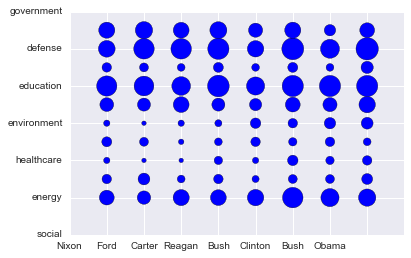

In [15]:
fig, ax = plt.subplots()
for i, president in enumerate(presidents_ordered):
    for j, topic in enumerate(stemmed_keywords.keys()):
        ax.scatter(i, j, s=zscore_df[zscore_df['president'] == president][topic]*10)
ax.set_xticklabels([p.split(' ')[-1] for p in presidents_ordered])
ax.set_yticklabels(list(stemmed_keywords.keys()))